In [1]:
import numpy as np

In [2]:
A = np.array([[4, -5],[-2, 3]])
print(A)

[[ 4 -5]
 [-2  3]]


In [3]:
b = np.array([[-13],[9]])
print(b)

[[-13]
 [  9]]


In [4]:
np.linalg.inv(A)

array([[1.5, 2.5],
       [1. , 2. ]])

In [5]:
x = np.linalg.inv(A).dot(b)
print(x)

[[3.]
 [5.]]


In [6]:
A = np.asmatrix(A)
b = np.asmatrix(b)
x = A.I*b
print(x)

[[3.]
 [5.]]


In [7]:
x = np.array([[1],
              [1]])

y = np.array([[2],
              [3]])

print(x.T.dot(y))

[[5]]


In [8]:
x = np.asmatrix(x)
y = np.asmatrix(y)

print(x.T*y)

[[5]]


In [9]:
x = np.array([[4],
              [3]])

np.linalg.norm(x, 2)

5.0

In [10]:
np.linalg.norm(x, 1)

7.0

In [11]:
!pip install cvxpy

In [12]:
import numpy as np
import cvxpy as cvx

f = np.array([[3], [3/2]])
lb = np.array([[-1], [0]])
ub = np.array([[2], [3]])

x = cvx.Variable([2,1])

obj = cvx.Minimize(-f.T*x)
constraints = [lb <= x, x <= ub]

prob = cvx.Problem(obj, constraints)
result = prob.solve()

print(x.value)
print(result)

[[2.]
 [3.]]
-10.5


In [13]:
f = np.array([[3], [4]])
H = np.array([[1/2, 0], [0, 0]])

A = np.array([[-1, -3], 
              [2, 5], 
              [3, 4]])

b = np.array([[-15], 
              [100], 
              [80]])

lb = np.array([[0], 
               [0]])

x = cvx.Variable([2,1])

obj = cvx.Minimize(cvx.quad_form(x, H) + f.T*x)
constraints = [A*x <= b, lb <= x]

prob = cvx.Problem(obj, constraints)
result = prob.solve()

print(x.value)
print(result)

[[-1.15591357e-25]
 [ 5.00000000e+00]]
20.000000000000004


In [14]:
f = np.array([[-6],[-6]])
H = np.array([[1, 0],[0, 1]])

A = np.array([1, 1])

b = 3
lb = np.array[[0, 0]]


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
a = np.array([[0],[1]])
b = np.array([[4],[2]])

Aeq = np.array([0, 1])
beq = 0

x = cvx.Variable([2,1])
obj = cvx.Minimize(cvx.norm(a-x,2) + cvx.norm(b-x, 2))
constraints = [Aeq*x == beq]

prob = cvx.Problem(obj, constraints)
result = prob.solve()

print(x.value)
print(result)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [ ]:
#A = np.hstack([np.ones([m, 1]), x])
A = np.hstack([x**0, x])

print(A)

In [ ]:
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

In [ ]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [ ]:
theta = np.random.randn(2,1)
theta = np.asmatrix(theta)

alpha = 0.001

for _ in range(1000):
    df = 2*(A.T*A*theta - A.T*y)
    theta = theta - alpha*df

print (theta)

In [ ]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# y = theta0 + theta1*x1 + theta2*x2 + noise

n = 200
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)
noise = 0.5*np.random.randn(n, 1);

y = 2 + 1*x1 + 3*x2 + noise

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Generated Data', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
#ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
A = np.hstack([np.ones((n, 1)), x1, x2])
A = np.asmatrix(A)
theta = (A.T*A).I*A.T*y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5), 
                     np.arange(np.min(x2), np.max(x2), 0.5))
YP = theta[0,0] + theta[1,0]*X1 + theta[2,0]*X2

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Regression', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.plot_wireframe(X1, X2, YP, color = 'k', alpha = 0.3, label = 'Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
xlsx_path = './weatherHistory.csv'
weather_data_csv = pd.read_csv(xlsx_path)

weather_data_csv

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [18]:
# Data Drop
weather_data = weather_data_csv.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'], axis = 1)

# Column rearrange
cols = list(weather_data.columns.values)
print("cols : ", cols)

output_column = cols[1]
cols.pop(1)
cols.append(output_column)

weather_data = weather_data[cols]
weather_data

cols :  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,26.016667
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,24.583333
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,22.038889
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,21.522222


[    0     1     2 ... 96450 96451 96452]


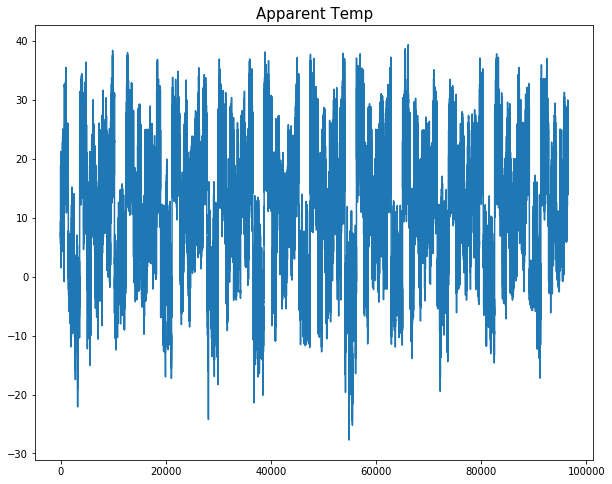

In [19]:
x_axis = np.arange(0, len(weather_data['Apparent Temperature (C)']), 1);
print(x_axis)

plt.figure(figsize = (10, 8))
plt.title("Apparent Temp", fontsize = 15)
plt.plot(x_axis, weather_data['Apparent Temperature (C)'])

In [20]:
# Data sort
weather_data = weather_data.sort_values(by = 'Apparent Temperature (C)', axis = 0)
weather_data

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
54864,-20.000000,0.78,11.2700,20.0,0.0000,1033.30,-27.716667
54845,-20.000000,0.82,8.0500,340.0,1.4490,1032.60,-26.227778
54866,-20.555556,0.78,6.4400,30.0,1.4490,1032.10,-25.922222
55489,-20.050000,0.78,6.2146,170.0,1.7066,1034.74,-25.200000
55492,-20.277778,0.79,5.6672,158.0,1.8032,1033.53,-25.072222
...,...,...,...,...,...,...,...
65534,37.072222,0.31,15.1501,205.0,10.3523,1012.63,38.255556
9903,36.972222,0.32,10.5294,224.0,9.9820,1018.76,38.377778
65535,37.872222,0.27,15.7136,212.0,9.9820,1011.88,38.416667
65533,37.266667,0.32,13.7494,175.0,9.9820,1013.15,38.661111


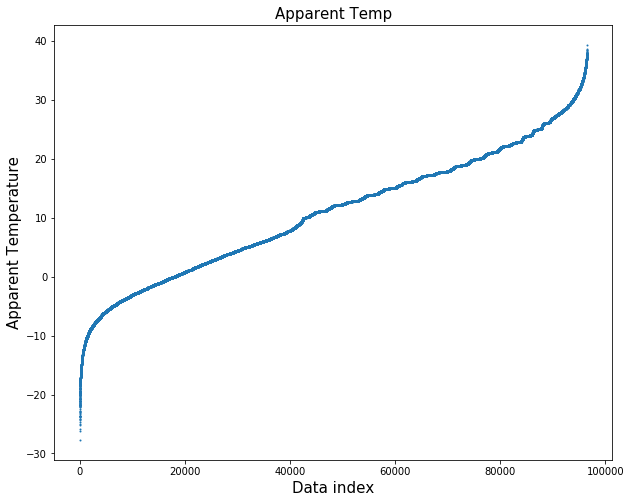

In [21]:
plt.figure(figsize = (10, 8))
plt.title("Apparent Temp", fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Apparent Temperature', fontsize = 15)
plt.plot(x_axis, weather_data['Apparent Temperature (C)'], 'o', markersize = 1)

In [22]:
inout_data = weather_data.values

inout_data.shape

(96453, 7)

In [23]:
input_data = inout_data[:, 0:-1]
output_data = inout_data[:, -1].reshape([-1, 1])

print(input_data.shape)
print(output_data.shape)

(96453, 6)
(96453, 1)


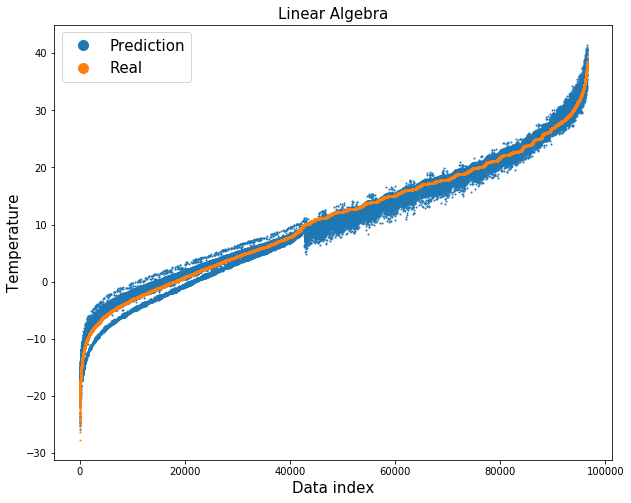

In [25]:
#Least Square
input_data_matrix = np.asmatrix(input_data)

theta = (input_data_matrix.T*input_data_matrix).I*input_data_matrix.T*output_data

y_hat = input_data_matrix*theta

plt.figure(figsize = (10, 8))
plt.title('Linear Algebra', fontsize = 15)
plt.xlabel('Data index', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.plot(y_hat, 'o', markersize = 1, label = 'Prediction')
plt.plot(output_data, 'o', markersize = 1, label = 'Real')
plt.legend(fontsize = 15, markerscale=10)
plt.show()

In [ ]:
# Gradient Descent
input_data_matrix = np.asmatrix(input_data)

theta = np.random.randn(6, 1)
theta = np.asmatrix(theta)

print("initial theta : ", theta.reshape([1, -1]))

# step size
alpha_init = 0.000000000001

#Find the theta using Gradient Descent
for _ in range(100000):
    df = 
    
print("fitted theta : ", theta.reshape([1, -1]))